# FMSR assignment: TTR sales revenue improvement
TTR (The Tea Room) is a chain of tea rooms with stores in various cities in The Netherlands. The company
is looking for ways to increase its revenue. They hired you as an analyst to write a clear and concise
advisory report for TTR on how to do so. TTR requests you to base your advice on a thorough statistical
analysis of the company’s sales data.

TTR provides you a sample of sales data from their stores in a CSV file which you can read into Python to
do your analysis. The variables in the dataset are:
 - transaction_id: Unique ID representing an individual transaction
 - transaction_date: Date of the transaction (MM/DD/YY)
 - transaction_time: Timestamp of the transaction (HH:MM:SS)
 - transaction_qty: Quantity of items sold
 - store_id: Unique ID of the tea room where the sale took place
 - store_location: Location of the tea room where the sale took place
 - unit_price: Sales price of the product sold
 - product_category: Description of the product category
 - product_type: Description of the type of product

The report consists of three parts. In the first part, TTR asks you to report on three compulsory questions.
In the second part, TTR asks you to report the examination of at least 3 other questions. In the third part,
you write at least 3 points of advice on how to increase revenue. This advice is based on the findings in
part 1 and part 2.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [96]:
data = pd.read_csv('data.csv')
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,1,04/14/2023,11:52:04,1,3.0,Eindhoven,3.25,Tea,Chai tea
1,2,04/15/2023,09:52:21,1,3.0,Eindhoven,3.50,Coffee,Milk coffee
2,3,04/13/2023,08:21:25,2,3.0,Eindhoven,4.25,Coffee,Syrup coffee
3,4,04/13/2023,14:40:02,4,3.0,Eindhoven,3.50,Tea,Herbal tea
4,5,04/13/2023,11:59:18,1,2.0,Utrecht,4.50,Chocolate,Hot chocolate


## Cleaning the data

In [97]:
missing_values = data.isnull().sum()
missing_values, len(data)

(transaction_id        0
 transaction_date     58
 transaction_time      0
 transaction_qty       0
 store_id            164
 store_location        0
 unit_price            0
 product_category      0
 product_type          0
 dtype: int64,
 7532)

Store_id can be removed as store_location will be used for the location. An imputed transaction_date doesnt add any value, and as it only contains 58 values, we will remove them instead

In [98]:
data = data.drop(columns=['store_id'])
data = data.dropna(subset=['transaction_date'])

In [99]:
missing_values = data.isnull().sum()
missing_values, len(data)

(transaction_id      0
 transaction_date    0
 transaction_time    0
 transaction_qty     0
 store_location      0
 unit_price          0
 product_category    0
 product_type        0
 dtype: int64,
 7474)

# Question 1 (compulsory): 
The quantity of items sold varies per transaction. TTR would like to know what the probability is that a 
transaction contains more than 2 items sold. Report and explain your analysis and conclusion.

To answer the question, we need to calculate the probability of a transaction containing more than 2 items sold.

This can be done by dividing the number of transactions with more than 2 items by the total number of transactions.


In [100]:
total_transactions = len(data)

transactions_more_than_2_items = len(data[data['transaction_qty'] > 2])
probability_more_than_2_items = transactions_more_than_2_items / total_transactions

print(f"""
    Based on the analysis of the provided sales data, out of a total of {total_transactions} transactions, 
    {transactions_more_than_2_items} transactions involved more than 2 items sold. 
    Thus, the probability that a transaction contains more than 2 items sold is approximately {int(probability_more_than_2_items*100)}%.
""")


    Based on the analysis of the provided sales data, out of a total of 7474 transactions, 
    1557 transactions involved more than 2 items sold. 
    Thus, the probability that a transaction contains more than 2 items sold is approximately 20%.



# Question 2 (compulsory):
TTR would like to obtain insight in how the unit price varies for the product types that they sell. Conduct 
appropriate analysis, report relevant descriptive statistics and use visualizations when reporting your 
findings. Include skewness in your interpretation.

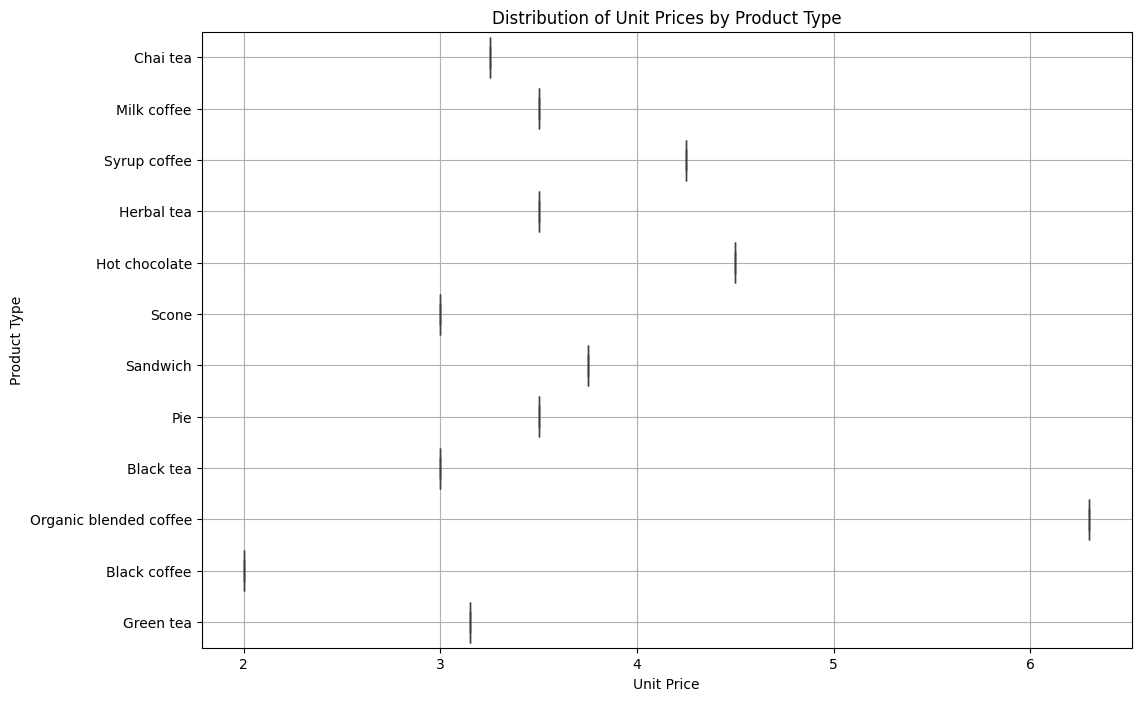

,product_type,count,mean,std,min,25%,50%,75%,max,skewness
0,Black coffee,443.0,2.00,0.000000e+00,2.00,2.00,2.00,2.00,2.00,0.0
1,Black tea,433.0,3.00,0.000000e+00,3.00,3.00,3.00,3.00,3.00,0.0
2,Chai tea,442.0,3.25,0.000000e+00,3.25,3.25,3.25,3.25,3.25,0.0
3,Green tea,452.0,3.15,8.891626e-16,3.15,3.15,3.15,3.15,3.15,0.0
4,Herbal tea,504.0,3.50,0.000000e+00,3.50,3.50,3.50,3.50,3.50,0.0
5,Hot chocolate,1822.0,4.50,0.000000e+00,4.50,4.50,4.50,4.50,4.50,0.0
6,Milk coffee,496.0,3.50,0.000000e+00,3.50,3.50,3.50,3.50,3.50,0.0
7,Organic blended coffee,454.0,6.30,2.667475e-15,6.30,6.30,6.30,6.30,6.30,0.0
8,Pie,611.0,3.50,0.000000e+00,3.50,3.50,3.50,3.50,3.50,0.0
9,Sandwich,672.0,3.75,0.000000e+00,3.75,3.75,3.75,3.75,3.75,0.0


In [101]:
unit_price_by_product_type = data.groupby('product_type')['unit_price'].describe()
skewness_by_product_type = data.groupby('product_type')['unit_price'].skew().reset_index(name='skewness')

unit_price_stats_with_skewness = unit_price_by_product_type.merge(skewness_by_product_type, on='product_type')

plt.figure(figsize=(12, 8))
sns.boxplot(x='unit_price', y='product_type', data=data)
plt.title('Distribution of Unit Prices by Product Type')
plt.xlabel('Unit Price')
plt.ylabel('Product Type')
plt.grid(True)

plt.show()

unit_price_stats_with_skewness

The box plot above suggests that TTR has a consistent pricing strategy across each product type, with no variation in unit prices. This indicates a potential lack of price differentiation within product categories.

# Question 3 (compulsory):
TTR would like to obtain insight in the average revenue per transaction. Because you are working with 
sample data, they would like to also report the interval in which the real (population) average revenue 
per transaction is likely to fall. Report and explain your analysis and conclusion

In [102]:
data['revenue_per_transaction'] = data['transaction_qty'] * data['unit_price']

average_revenue = data['revenue_per_transaction'].mean()
std_dev_revenue = data['revenue_per_transaction'].std(ddof=1)

n = len(data)

confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, average_revenue, std_dev_revenue/np.sqrt(n))


print(f"""
      The average revenue per transaction, based on the sample data, is around €{round(average_revenue, 2)}. 
      The {confidence_level*100}% confidence interval for the real (population) average revenue per transaction is between around €{round(confidence_interval[0], 2)} and €{round(confidence_interval[1], 2)}.
""")


      The average revenue per transaction, based on the sample data, is around €7.69. 
      The 95.0% confidence interval for the real (population) average revenue per transaction is between around €7.57 and €7.8.



# Report part 2
TTR would like receive three points of advice on increasing revenues, based on three other questions that 
you examine. To provide sound advice, you report for each question the results of a descriptive analysis 
and inferential analysis. I.e., based on the results of the descriptive analysis, you make an assumption (you 
formulate hypotheses) which you test using inferential statistical analysis. Your points of advice are based 
on those results

The three topics and corresponding questions that I have chosen to examine are:

1. Topic A - Product Categories (A1): Analyze how different product categories contribute to overall revenue and test if there are significant differences in revenue generated by each category.
2. Topic C - Tea Room Locations (C1): Examine how sales revenue compares across different tea room locations to identify if certain locations are underperforming.
3. Topic E - Evolvement of Sales During Time (E1): Investigate the revenue patterns throughout the week to determine if there are specific days with significantly higher or lower sales revenue.


## A1: Analyze how different product categories contribute to overall revenue and test if there are significant differences in revenue generated by each category.

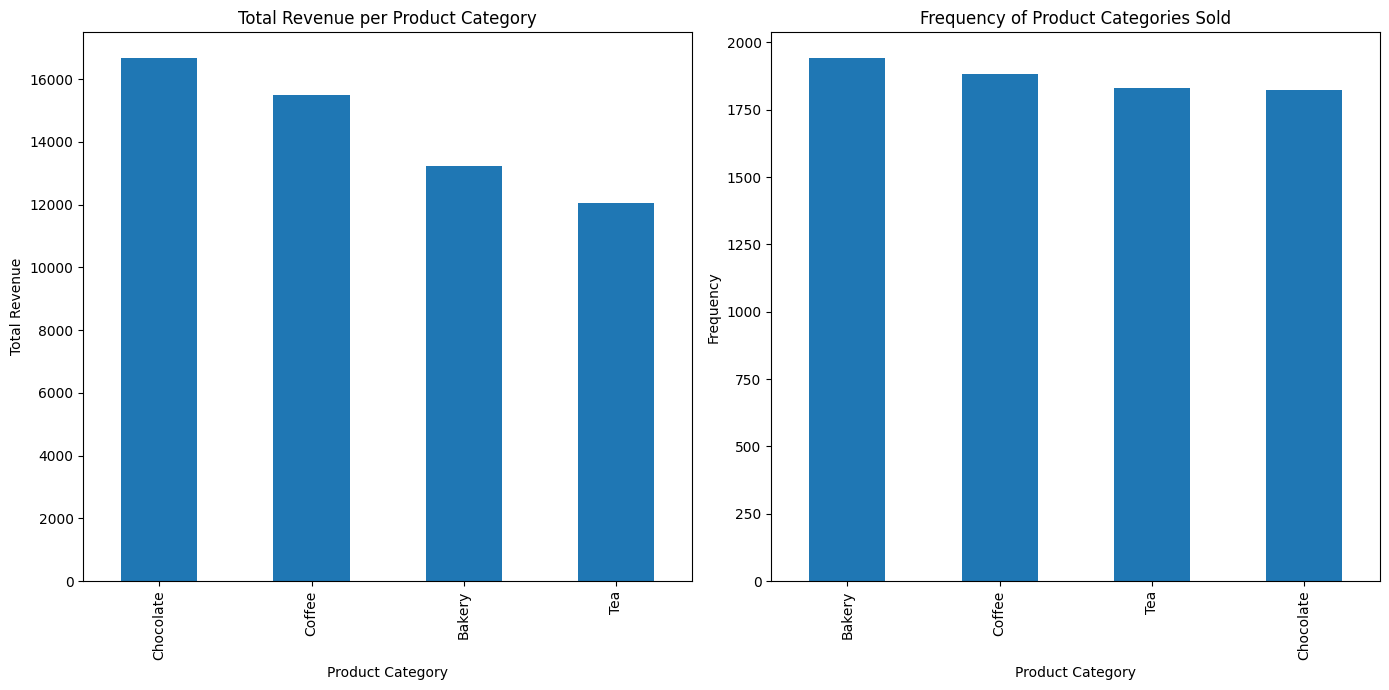


    Descriptive Analysis:

    Total Revenue by Category: The bar chart shows the total revenue generated by each product category. The 'Chocolate' category generated the highest revenue, followed closely by Coffee, Bakery, Tea.

    Measures of Central Tendency and Variation:

    Mean Revenue: The average revenue across categories is approximately €14361.
    Standard Deviation: There's a variation in revenue with a standard deviation of about €2101, indicating some disparity in how different categories perform in terms of revenue.
    Distribution (Skewness): The skewness of the revenue distribution across categories is close to zero (-0.02), suggesting a fairly symmetric distribution of total revenue among the product categories.

    Frequency of Sales: The frequency of sales across categories is relatively balanced, with 'Bakery' being the most frequently sold category, followed by Coffee, Tea, Chocolate.



In [103]:
category_revenue = data.groupby('product_category')['revenue_per_transaction'].sum().sort_values(ascending=False)

category_revenue_mean = category_revenue.mean()
category_revenue_std = category_revenue.std()

category_revenue_skewness = category_revenue.skew()
category_frequency = data['product_category'].value_counts()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
category_revenue.plot(kind='bar')
plt.title('Total Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')


plt.subplot(1, 2, 2)
category_frequency.plot(kind='bar')
plt.title('Frequency of Product Categories Sold')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

print(f"""
    Descriptive Analysis:

    Total Revenue by Category: The bar chart shows the total revenue generated by each product category. The '{category_revenue.index[0]}' category generated the highest revenue, followed closely by {', '.join(category_revenue.index[1:])}.

    Measures of Central Tendency and Variation:

    Mean Revenue: The average revenue across categories is approximately €{round(category_revenue_mean)}.
    Standard Deviation: There's a variation in revenue with a standard deviation of about €{round(category_revenue_std)}, indicating some disparity in how different categories perform in terms of revenue.
    Distribution (Skewness): The skewness of the revenue distribution across categories is close to zero ({round(category_revenue_skewness, 2)}), suggesting a fairly symmetric distribution of total revenue among the product categories.

    Frequency of Sales: The frequency of sales across categories is relatively balanced, with '{category_frequency.index[0]}' being the most frequently sold category, followed by {', '.join(category_frequency.index[1:])}.
""")


### Inferential Analysis Plan

To test whether there are significant differences in revenue between product categories, we can perform an ANOVA (Analysis of Variance) test since we have more than two groups to compare. Our hypothesis test plan is as follows:

#### Null Hypothesis (H0): There is no significant difference in revenue between the product categories.
#### Alternative Hypothesis (H1): There is a significant difference in revenue between the product categories.
We will use a significance level (alpha) of 0.05 for this test. If the p-value from the ANOVA test is less than 0.05, we will reject the null hypothesis, suggesting that at least one product category has significantly different revenue from the others.

In [104]:
revenue_lists = data.groupby('product_category')['revenue_per_transaction'].apply(list)
f_value, p_value = stats.f_oneway(*revenue_lists)

print(f"""
    The ANOVA test resulted in an F-value of approximately {round(f_value,2)} and a p-value significantly less than 0.05 (p < {p_value}). 
    This suggests that we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in revenue between at least some of the product categories.
""")


    The ANOVA test resulted in an F-value of approximately 109.72 and a p-value significantly less than 0.05 (p < 1.6157816154333474e-69). 
    This suggests that we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in revenue between at least some of the product categories.



# A1: Conclusion and Advice

Given the significant differences in revenue between product categories, TTR should consider focusing on categories with higher revenue potential. Strategies could include expanding the range of high-revenue generating products or implementing targeted marketing campaigns to boost sales in those categories. It may also be beneficial to analyze the profitability of each category, as revenue does not account for costs, and adjust the product offerings or pricing strategy accordingly.

## C1: Examine how sales revenue compares across different tea room locations to identify if certain locations are underperforming.

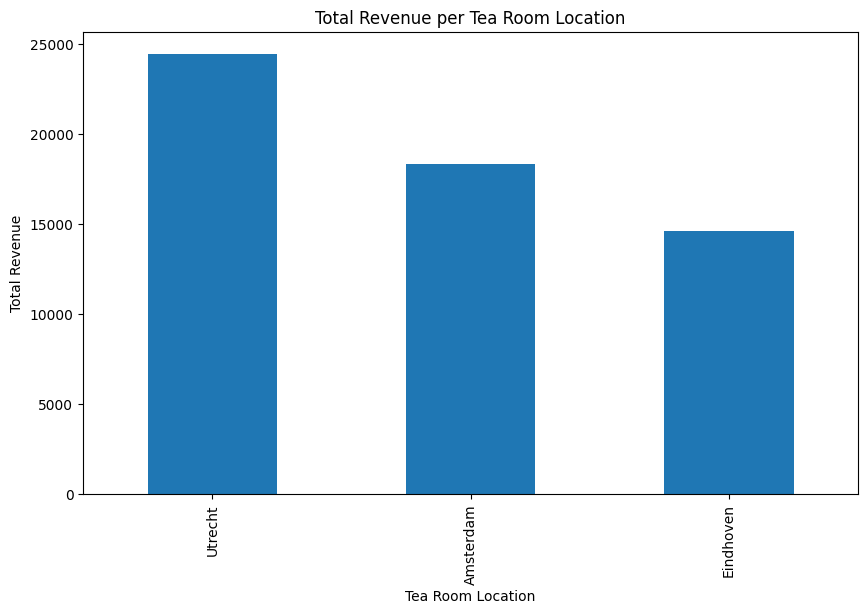


    Descriptive Analysis for Tea Room Locations (C1):

    Total Revenue by Location: The bar chart indicates that 'Utrecht' generates the highest total revenue, followed by Amsterdam, Eindhoven.

    Measures of Central Tendency and Variation:

    Mean Revenue: The average revenue across locations is approximately €19149.
    Standard Deviation: The standard deviation in revenue across locations is about €4954, suggesting that there is a substantial difference in revenue performance between locations.
    Distribution (Skewness): The skewness of the revenue distribution across locations is positive (0.69), indicating that the distribution of revenue among locations is skewed to the right. This suggests that a smaller number of locations may be generating higher revenue compared to others.



In [105]:
location_revenue = data.groupby('store_location')['revenue_per_transaction'].sum().sort_values(ascending=False)

location_revenue_mean = location_revenue.mean()
location_revenue_std = location_revenue.std()

location_revenue_skewness = location_revenue.skew()

plt.figure(figsize=(10, 6))

location_revenue.plot(kind='bar')

plt.title('Total Revenue per Tea Room Location')
plt.xlabel('Tea Room Location')
plt.ylabel('Total Revenue')

plt.show()

print(f"""
    Descriptive Analysis for Tea Room Locations (C1):

    Total Revenue by Location: The bar chart indicates that '{location_revenue.index[0]}' generates the highest total revenue, followed by {', '.join(location_revenue.index[1:])}.

    Measures of Central Tendency and Variation:

    Mean Revenue: The average revenue across locations is approximately €{round(location_revenue_mean)}.
    Standard Deviation: The standard deviation in revenue across locations is about €{round(location_revenue_std)}, suggesting that there is a substantial difference in revenue performance between locations.
    Distribution (Skewness): The skewness of the revenue distribution across locations is positive ({round(location_revenue_skewness, 2)}), indicating that the distribution of revenue among locations is skewed to the right. This suggests that a smaller number of locations may be generating higher revenue compared to others.
""")

### Inferential Analysis Plan for Tea Room Locations (C1):

We will perform a hypothesis test to determine if the observed differences in revenue between tea room locations are statistically significant. The hypothesis test plan is as follows:

#### Null Hypothesis (H0): There is no significant difference in revenue between tea room locations.
#### Alternative Hypothesis (H1): There is a significant difference in revenue between tea room locations.
Again, we will use an ANOVA test to compare the means across the different locations with a significance level (alpha) of 0.05. If the p-value is less than 0.05, we will reject the null hypothesis, indicating that there are significant differences between the locations.

In [106]:
revenue_lists_by_location = data.groupby('store_location')['revenue_per_transaction'].apply(list)

f_value_locations, p_value_locations = stats.f_oneway(*revenue_lists_by_location)

print(f"""
    Inferential Analysis Results for Tea Room Locations (C1):

    The ANOVA test resulted in an F-value of approximately {round(f_value_locations, 2)} and a p-value of about {round(p_value_locations, 2)}. With a p-value higher than the conventional threshold of 0.05, we fail to reject the null hypothesis. 
    This indicates that the differences in revenue between tea room locations are not statistically significant at the 95% confidence level.
""")


    Inferential Analysis Results for Tea Room Locations (C1):

    The ANOVA test resulted in an F-value of approximately 1.31 and a p-value of about 0.27. With a p-value higher than the conventional threshold of 0.05, we fail to reject the null hypothesis. 
    This indicates that the differences in revenue between tea room locations are not statistically significant at the 95% confidence level.



## Conclusion and Advice:

Despite the observed differences in total revenue across locations, these differences are not statistically significant. It's likely that other factors, such as operational days, store size, or customer traffic, could be contributing to the observed variance. My advice to TTR is to:

1. <b>Investigate other factors</b>: Look beyond revenue numbers to understand the drivers behind the performance of each location. Analyze factors such as customer footfall, local competition, and marketing efforts.

2. <b>Local Marketing Strategies</b>: Even without significant differences in revenue, tailored marketing strategies for each location could still improve performance by attracting more customers or increasing the average transaction size.

3. <b>Efficiency Improvements</b>: Focus on operational efficiency, customer satisfaction, and product mix optimization at each location to ensure that revenue potential is maximized

# Investigate the revenue patterns throughout the week to determine if there are specific days with significantly higher or lower sales revenue.

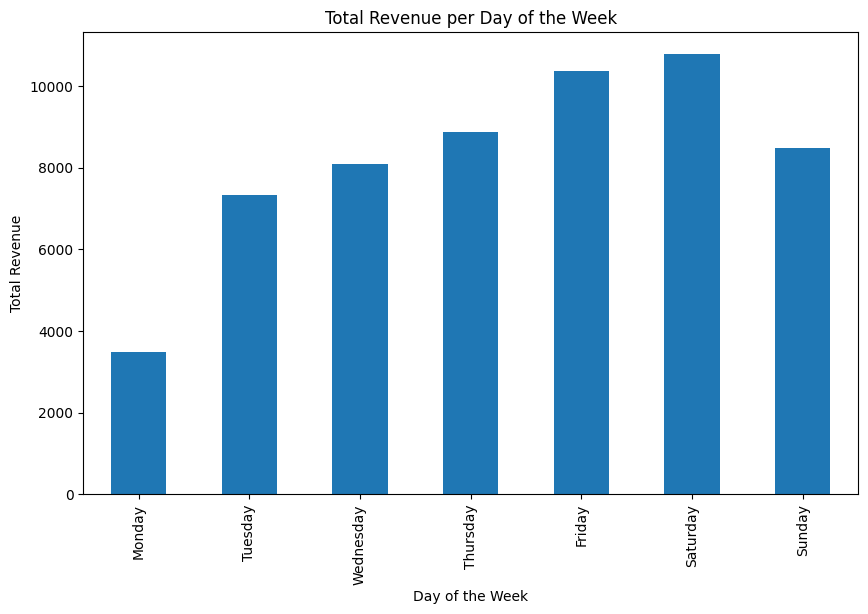


    Descriptive Analysis for Sales During the Week (E1):

    Total Revenue by Day of the Week: The bar chart displays the total revenue generated for each day of the week. It shows a trend of increasing revenue throughout the week, with Monday being the highest.

    Measures of Central Tendency and Variation:

    Mean Revenue: The average daily revenue across the week is approximately €8207.
    Standard Deviation: The standard deviation of about €2411 indicates variability in daily revenue across the week.
    Distribution (Skewness): The negative skewness (-1.3) suggests that the distribution of daily revenue has a longer ending on the lower end, meaning there are days with particularly low revenue which makes the mean lower.



In [107]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['day_of_week'] = data['transaction_date'].dt.day_name()

revenue_per_day = data.groupby('day_of_week')['revenue_per_transaction'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

daily_revenue_mean = revenue_per_day.mean()
daily_revenue_std = revenue_per_day.std()

daily_revenue_skewness = revenue_per_day.skew()

plt.figure(figsize=(10, 6))

revenue_per_day.plot(kind='bar')
plt.title('Total Revenue per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')

plt.show()

print(f"""
    Descriptive Analysis for Sales During the Week (E1):

    Total Revenue by Day of the Week: The bar chart displays the total revenue generated for each day of the week. It shows a trend of increasing revenue throughout the week, with {revenue_per_day.index[0]} being the highest.

    Measures of Central Tendency and Variation:

    Mean Revenue: The average daily revenue across the week is approximately €{round(daily_revenue_mean)}.
    Standard Deviation: The standard deviation of about €{round(daily_revenue_std)} indicates variability in daily revenue across the week.
    Distribution (Skewness): The negative skewness ({round(daily_revenue_skewness, 2)}) suggests that the distribution of daily revenue has a longer ending on the lower end, meaning there are days with particularly low revenue which makes the mean lower.
""")

### Inferential Analysis Plan for Sales During the Week (E1):

We will conduct a hypothesis test to determine if the differences in daily revenue are statistically significant. The hypothesis test plan is:

#### Null Hypothesis (H0): There is no significant difference in daily sales revenue throughout the week.
#### Alternative Hypothesis (H1): There is a significant difference in daily sales revenue throughout the week.
We'll use ANOVA for this hypothesis test, with a significance level (alpha) of 0.05. A p-value less than 0.05 will indicate that we should reject the null hypothesis, which means there are significant differences in daily revenue.

In [108]:
revenue_lists_by_day = data.groupby('day_of_week')['revenue_per_transaction'].apply(list)

f_value_days, p_value_days = stats.f_oneway(*revenue_lists_by_day)

print(f"""
    Inferential Analysis Results for Sales During the Week (E1):

    The ANOVA test gives us an F-value of approximately {round(f_value_days, 2)} and a p-value of about {round(p_value_days, 2)}. 
    Since the p-value is just below the 0.05 threshold, this suggests that there are significant differences in daily sales revenue throughout the week.
""")


    Inferential Analysis Results for Sales During the Week (E1):

    The ANOVA test gives us an F-value of approximately 2.12 and a p-value of about 0.05. 
    Since the p-value is just below the 0.05 threshold, this suggests that there are significant differences in daily sales revenue throughout the week.



## Conclusion and Advice:

Given the statistically significant differences in revenue across different days of the week, TTR should:
1. <b>Optimize Staffing and Inventory</b>: Increase staffing and inventory levels on days with higher sales, such as Friday and Saturday, to maximize revenue.
2. <b>Promotions and Marketing</b>: Consider creating daily specials or promotions to boost sales on slower days, particularly Monday, to create a more even distribution of revenue throughout the week.
3. <b>Strategic Planning</b>: Use these insights for strategic planning in areas such as budgeting, forecasting, and marketing to ensure resources are allocated efficiently throughout the week. ​

# Conclusion: How to increase revenue
_The following conclusions are co-authored by ChatGPT (for unique insights!)_

Based on the analyses conducted, here are three pieces of advice for TTR to consider in order to increase their revenue:

## Enhance Focus on High-Revenue Product Categories:

 - <b>The analysis:</b> revealed significant differences in revenue generation between product categories. Some categories, such as Chocolate and Coffee, perform exceptionally well in terms of revenue.
 - <b>Actions to take:</b> TTR should capitalize on high-performing categories by expanding their variety, enhancing their visibility in stores, and considering cross-promotional strategies, like grouped menu's(?)
## Strategic Management of Tea Room Locations:

 - <b>The analysis:</b> While the differences in revenue by location were not statistically significant, operational efficiency can still be optimized based on the revenue performance of each location.
 - <b>Actions to take:</b> Conduct a detailed review of lower-performing locations to identify possible causes—such as customer traffic, local competition, and market saturation. Tailoring marketing efforts to local demographics and increasing community engagement through events or loyalty programs could also be beneficial. Improving operational efficiency, perhaps by adjusting opening hours or staff schedules based on customer flow, can reduce costs and improve revenue.

## Leverage Sales Patterns Throughout the Week:

 - <b>The analysis:</b> Significant differences were observed in daily revenues, with weekends, particularly Saturday, showing higher sales.
 - <b>Actions to take:</b> To improve revenue on slower days, TTR could introduce weekday specials or happy hour discounts to draw in more customers. Additionally, optimizing staffing levels and inventory to match the busier days can improve customer experience and sales. TTR could also explore opportunities for catering or hosting events on typically slower days to increase revenue.